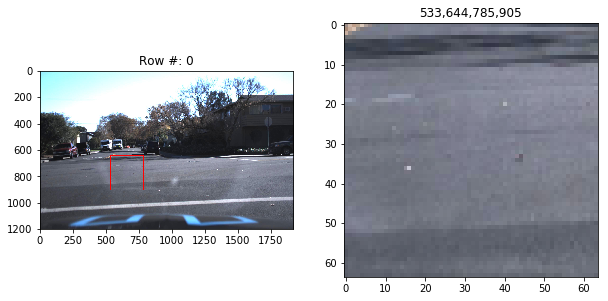

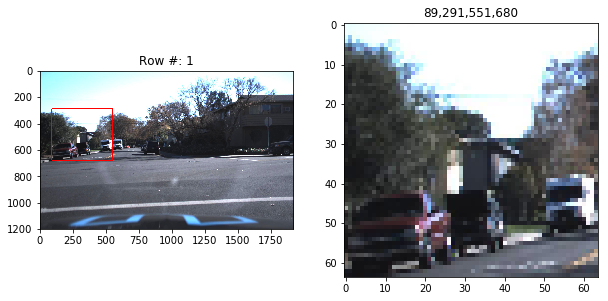

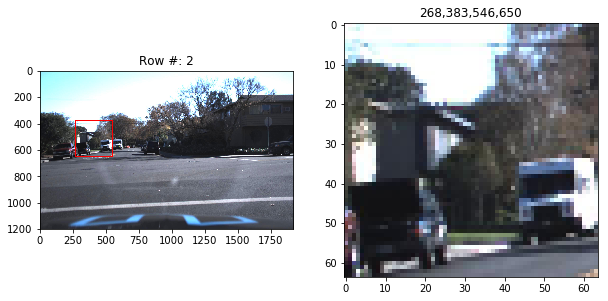

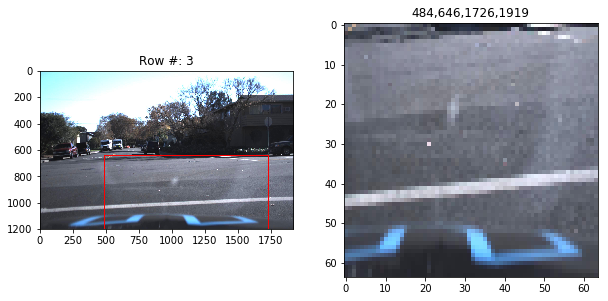

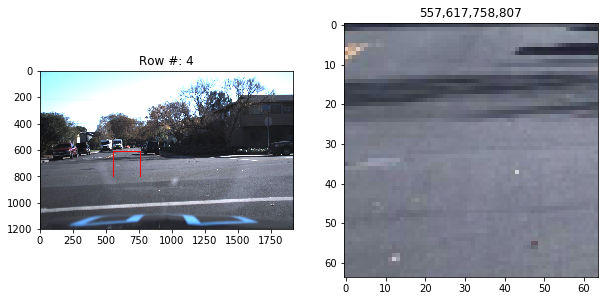

In [40]:
import csv
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

with open('./sample_data/object-detection-crowdai/labels.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader, None)
    
    index = 0
    for row in reader:
        if row[5] == 'Car':
            #print(row)
            filename = row[4]
            
            img = mpimg.imread('./sample_data/object-detection-crowdai/{}'.format(filename))
            
            x = [int(row[0]), int(row[1])]
            y = [int(row[2]), int(row[3])]
            
            if x[0] < x[1]:
                x1, x2 = x[0], x[1]
            else:
                x2, x1 = x[0], x[1]
                
            if y[0] < y[1]:
                y1, y2 = y[0], y[1]
            else:
                y2, y1 = y[0], y[1]
            
            img_car = img[y1:y2,x1:x2]
            img_car_64 = cv2.resize(img_car, (64,64))

            cv2.rectangle(img, (x1,y1), (x2,y2), (255, 0, 0), 6)
            
            f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
            ax1.imshow(img)
            ax1.set_title('Row #: {}'.format(index))
            ax2.imshow(img_car_64)
            ax2.set_title('{},{},{},{}'.format(x1,y1, x2, y2))
            
            index += 1
            if index > 4:
                break
plt.show()